<a href="https://colab.research.google.com/github/wZhengX/AIassignment/blob/main/testAIassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# 1. Load Data
df = pd.read_csv('Crop_recommendation.csv')

# 2. Preprocessing
# The 'label' column (Rice, Maize, etc.) is text. We convert it to numbers.
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Define Features (X) and Target (y)
X = df.drop(['label', 'label_encoded'], axis=1)
y = df['label_encoded']



Missing Values:
 N                0
P                0
K                0
temperature      0
humidity         0
ph               0
rainfall         0
label            0
label_encoded    0
dtype: int64


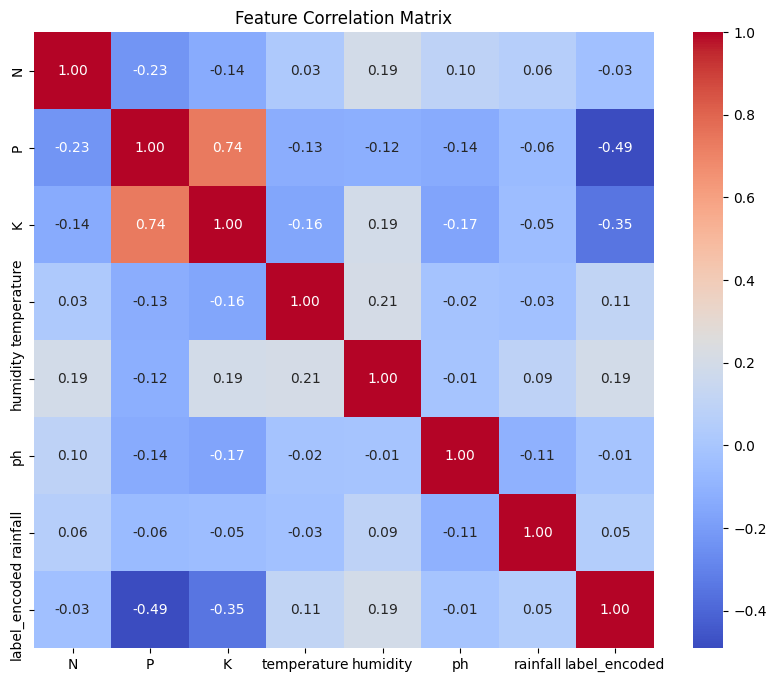

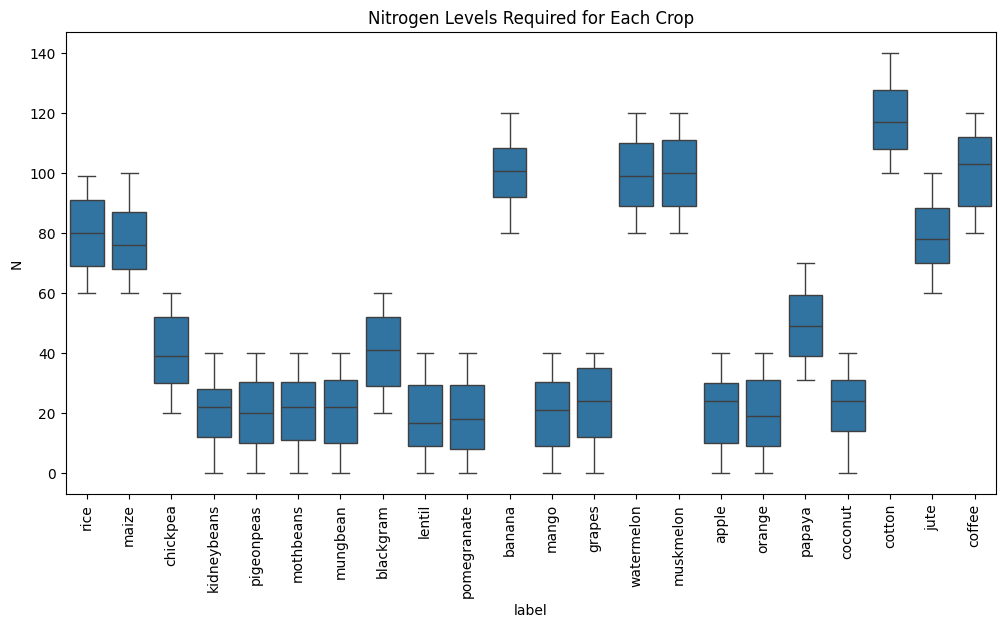

In [3]:
# --- SECTION 2: EXPLORATORY DATA ANALYSIS (EDA) ---
import numpy as np  # <--- This line fixes your error
# Check for missing values (Demonstrates Data Preprocessing skill)
print("Missing Values:\n", df.isnull().sum())

# Visualization 1: Correlation Heatmap
# This shows which features (like Rainfall or Temperature) are related
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True,   cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

# Visualization 2: Distribution of Key Features
# Show how different crops require different Nitrogen (N) levels
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='N', data=df)
plt.title('Nitrogen Levels Required for Each Crop')
plt.xticks(rotation=90) # Rotate crop names so they are readable
plt.show()

Model Accuracy on Crop Data:
Logistic Regression: 0.9636
Decision Tree: 0.9818
Random Forest: 0.9932
SVM: 0.9682
KNN: 0.9568


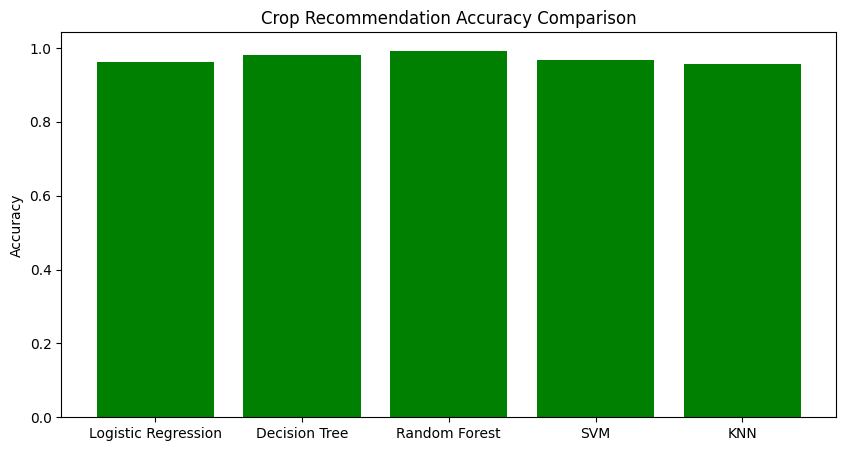

Training models...

--- MODEL PERFORMANCE SUMMARY ---
             Algorithm  Accuracy  F1-Score  Precision    Recall
2        Random Forest  0.993182  0.993175   0.993735  0.993182
1        Decision Tree  0.986364  0.986324   0.986838  0.986364
3                  SVM  0.968182  0.968027   0.971517  0.968182
0  Logistic Regression  0.963636  0.963512   0.964442  0.963636
4                  KNN  0.956818  0.956749   0.962898  0.956818


/tmp/ipython-input-3278456460.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithm', y='Accuracy', data=results_df, palette='viridis')


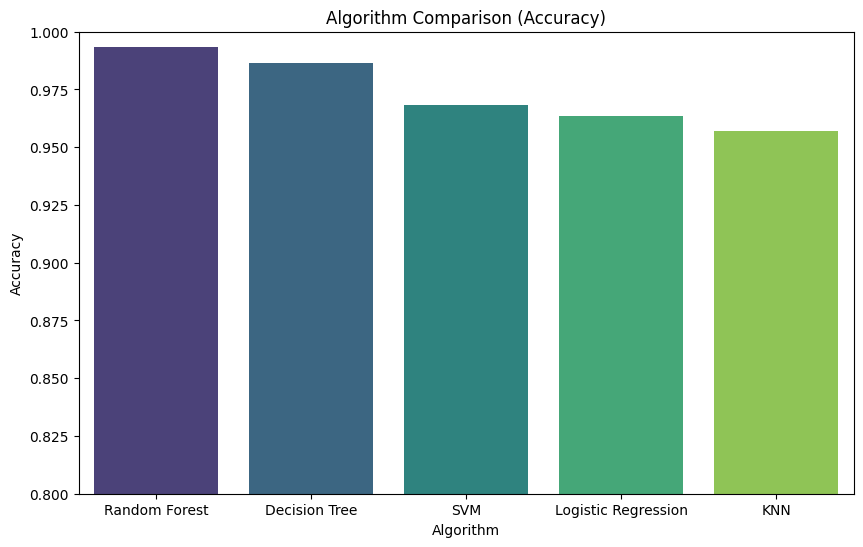

In [6]:
#   Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Data (Crucial for SVM and KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- THE 5 ALGORITHMS ---
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000), # Increased iter for convergence
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Train and Compare
print("Model Accuracy on Crop Data:\n" + "="*30)
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Visualize
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color='green')
plt.title('Crop Recommendation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Train and Store Metrics
model_results = []

print("Training models...")
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Calculate weighted average for multi-class classification
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average='weighted')
    prec = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')

    model_results.append({
        "Algorithm": name,
        "Accuracy": acc,
        "F1-Score": f1,
        "Precision": prec,
        "Recall": recall
    })

# 4. Create Comparison DataFrame
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Display the table (Perfect for Assignment Comparison)
print("\n--- MODEL PERFORMANCE SUMMARY ---")
print(results_df)

# Visualize Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=results_df, palette='viridis')
plt.title('Algorithm Comparison (Accuracy)')
plt.ylim(0.8, 1.0) # Zoom in to see differences
plt.show()

In [7]:
# --- SECTION 4: HYPERPARAMETER TUNING ---
from sklearn.model_selection import GridSearchCV

# We will tune the Random Forest model
print("Starting Hyperparameter Tuning for Random Forest...")

# Define the "grid" of settings to test
param_grid = {
    'n_estimators': [50, 100, 200],     # Try different numbers of trees
    'max_depth': [None, 10, 20],        # Try different tree depths
    'criterion': ['gini', 'entropy']    # Try different math formulas
}

# Run the search (This might take a minute)
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters Found: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Starting Hyperparameter Tuning for Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters Found: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 200}


FINAL CLASSIFICATION REPORT:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        

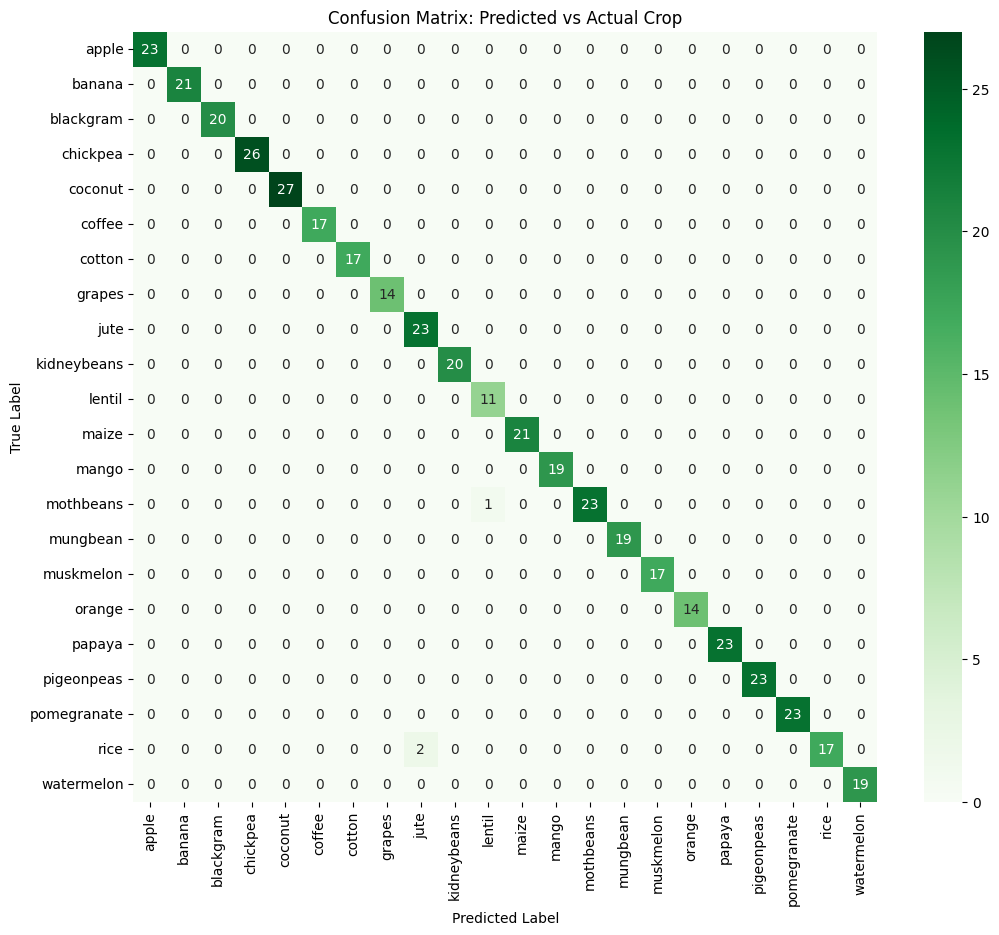

In [8]:
# --- FINAL EVALUATION ---
from sklearn.metrics import classification_report, confusion_matrix

# 1. Use the best model found by GridSearch to predict
# (Note: grid_search automatically refits the best model on the whole training set)
best_rf_model = grid_search.best_estimator_
y_pred_final = best_rf_model.predict(X_test)

# 2. Print the Detailed Classification Report
# This gives you Precision, Recall, and F1-Score for every single crop
print("FINAL CLASSIFICATION REPORT:\n")
# We use le.classes_ to get the actual names (Rice, Maize) instead of numbers
print(classification_report(y_test, y_pred_final, target_names=le.classes_))

# 3. Plot the Confusion Matrix
# This satisfies the "Interpretation" criteria by showing exactly where errors happen
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix: Predicted vs Actual Crop')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.show()